In [1]:
import os
os.chdir('D:/datasets/')

In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df=pd.read_csv('Cars93.csv')
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [14]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               37
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [68]:
x=df.drop(['Price','Min.Price','id'],axis=1)
y=df['Price']

# Preprocessing

In [69]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        x[i]=x[i].fillna(x[i].mode()[0])
        cat.append(i)
    else:
        x[i]=x[i].fillna(x[i].median())
        con.append(i)
        
        

In [70]:
x.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [71]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [72]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Max.Price', 'MPG.city', 'MPG.highway',
                                  'EngineSize', 'Horsepower', 'RPM',
                                  'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room', 'Weight']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

In [73]:
x1=pd.DataFrame(pre.fit_transform(x).toarray(),columns=pre.get_feature_names_out())
x1

,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,num_pipe__Passengers,num_pipe__Length,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
0,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

# Building Model

In [75]:
lr=LinearRegression()
la=Lasso()
ri=Ridge()

In [76]:
list1=[lr,la,ri]

In [77]:
for i in list1:
    print(i)
    i.fit(x_train,y_train)
    tr_pred=i.predict(x_train)
    ts_pred=i.predict(x_test)
    
    mse=round(mean_squared_error(tr_pred,y_train),2)
    rmse=round(np.sqrt(mse),2)
    print('Train rmse',rmse)


    mse1=round(mean_squared_error(ts_pred,y_test),2)
    rmse1=round(np.sqrt(mse1),2)
    print('Test rmse',rmse1)
    print('*'*20)
    

LinearRegression()
Train rmse 0.0
Test rmse 1.81
********************
Lasso()
Train rmse 1.87
Test rmse 2.03
********************
Ridge()
Train rmse 0.33
Test rmse 1.82
********************


In [78]:
la

Lasso()

# Training Data Evaluation

In [79]:
grid={'alpha':np.arange(0.1,2,0.01)}
grid

{'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
        0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
        0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
        0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
        0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
        0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
        0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
        0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
        1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
        1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
        1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
        1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
        1.53, 1.54, 1.55, 1.5

In [80]:
rs=RandomizedSearchCV(la,param_distributions=grid,cv=2)

In [81]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=Lasso(),
                   param_distributions={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.6...
       1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74,
       1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85,
       1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96,
       1.97, 1.98, 1.99])})

In [82]:
rs.best_params_

{'alpha': 0.29999999999999993}

In [83]:
la1=rs.best_estimator_
la1

Lasso(alpha=0.29999999999999993)

In [84]:
y_pred_train=la1.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred_train,y_train)
r=r2_score(y_pred_train,y_train)

print('RMSE:',rmse)
print('MSE:',mse)
print('MAE:',mae)
print('R2:',r)

RMSE: 1.5456307037851897
MSE: 2.388974272483501
MAE: 1.1947216103884262
R2: 0.9724229159319663


In [85]:
y_pred=la1.predict(x_test)

mse1=mean_squared_error(y_pred,y_test)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_pred,y_test)
r1=r2_score(y_pred,y_test)

print('RMSE:',rmse1)
print('MSE:',mse1)
print('MAE:',mae1)
print('R2:',r1)

RMSE: 1.9705102860468422
MSE: 3.882910787416408
MAE: 1.2797930912435056
R2: 0.9490205808606099


<Axes: ylabel='Price'>

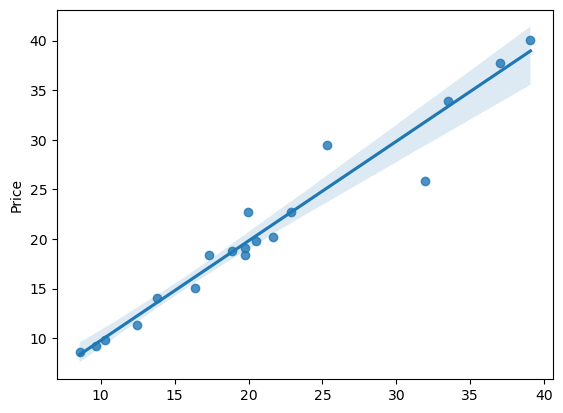

In [86]:
sns.regplot(x=y_pred,y=y_test)

In [87]:
df2=pd.read_csv('sample.csv')
df2

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,NaN,Front,...,5,181,101,66,39,25.0,13.0,2575,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,NaN,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,NaN,Front,...,4,163,93,63,34,26.0,10.0,2240,non-USA,Volkswagen Fox


In [88]:
df2_pre=pd.DataFrame(pre.transform(df2).toarray(),columns=pre.get_feature_names_out())
df2_pre

,num_pipe__Max.Price,num_pipe__MPG.city,num_pipe__MPG.highway,num_pipe__EngineSize,num_pipe__Horsepower,num_pipe__RPM,num_pipe__Rev.per.mile,num_pipe__Fuel.tank.capacity,num_pipe__Passengers,num_pipe__Length,...,cat_pipe__Make_Toyota Camry,cat_pipe__Make_Toyota Celica,cat_pipe__Make_Toyota Previa,cat_pipe__Make_Toyota Tercel,cat_pipe__Make_Volkswagen Corrado,cat_pipe__Make_Volkswagen Eurovan,cat_pipe__Make_Volkswagen Fox,cat_pipe__Make_Volkswagen Passat,cat_pipe__Make_Volvo 240,cat_pipe__Make_Volvo 850
0,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
pred=la1.predict(df2_pre)
pred

array([37.0189764 , 11.90315202, 16.08918923, 30.12912463,  8.64143718])

In [90]:
prediction=df2[['Price']]

In [91]:
prediction

,Price
0,37.7
1,11.1
2,15.9
3,32.5
4,9.1


In [93]:
prediction['pred']=pred

In [94]:
prediction

,Price,pred
0,37.7,37.018976
1,11.1,11.903152
2,15.9,16.089189
3,32.5,30.129125
4,9.1,8.641437


<Axes: xlabel='Price', ylabel='pred'>

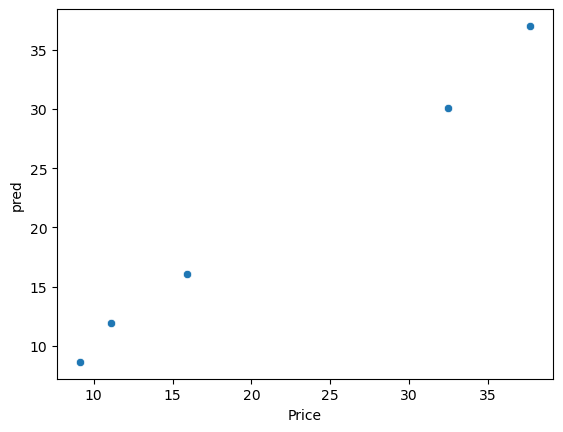

In [95]:
sns.scatterplot(x=prediction['Price'],y=prediction['pred'])

<Axes: xlabel='Price', ylabel='pred'>

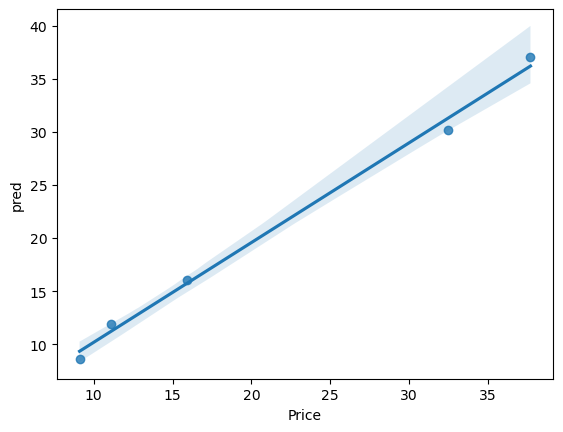

In [96]:
sns.regplot(x=prediction['Price'],y=prediction['pred'])

In [97]:
prediction.to_csv('result.csv',index=False)